# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [15]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [3]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [14]:
clicks = [clicks_a, clicks_b]
visitors = [visitors_a, visitors_b]

stat, pval = proportions_ztest(count=clicks, nobs=visitors, alternative='smaller')
print(f"P-value: {pval}")

alpha = 0.05
if pval < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

P-value: 0.09348364227439016
We fail to reject the null hypothesis


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [16]:
# Null Hypothesis (H₀): There is no difference in click-through rates between Version A and Version B.
# Alternative Hypothesis (H₁): There is a difference in click-through rates between Version A and Version B.


- Run the Test

In [17]:
# Rows: Version A and B
# Columns: Clicked, Not Clicked
contingency_table = np.array([
    [150, 850],  # Version A
    [180, 870]   # Version B
])

chi2, p, dof, expected = chi2_contingency(contingency_table)

> Interpret Results

In [18]:
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("We reject the null hypothesis: There is a significant difference in CTR.")
else:
    print("We fail to reject the null hypothesis: No significant difference in CTR.")

Chi-square statistic: 1.586311673629987
p-value: 0.20785388523374115
We fail to reject the null hypothesis: No significant difference in CTR.


📈 Visualization

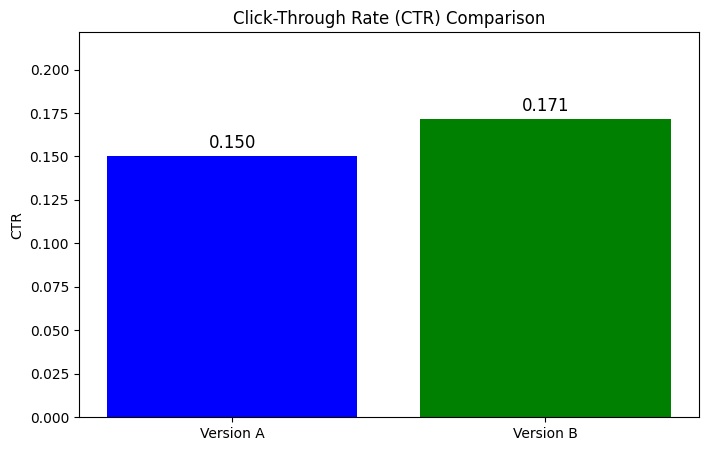

In [19]:
# Calculate CTRs
ctr_a = clicks_a / visitors_a
ctr_b = clicks_b / visitors_b

# Bar chart
versions = ['Version A', 'Version B']
ctrs = [ctr_a, ctr_b]

plt.figure(figsize=(8, 5))
plt.bar(versions, ctrs, color=['blue', 'green'])
plt.title('Click-Through Rate (CTR) Comparison')
plt.ylabel('CTR')
plt.ylim(0, max(ctrs) + 0.05)

# Annotate bars with exact CTR values
for i, ctr in enumerate(ctrs):
    plt.text(i, ctr + 0.005, f'{ctr:.3f}', ha='center', fontsize=12)

plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [20]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [21]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [27]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [28]:
data['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [29]:
data['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [30]:
group_ad = data[data['test group'] == 'ad']
group_psa = data[data['test group'] == 'psa']

conversion_rate_a = group_ad['converted'].mean()
conversion_rate_b = group_psa['converted'].mean()

print(conversion_rate_a, conversion_rate_b)

0.025546559636683747 0.01785410644448223


> Statistical Test

In [32]:
successes = [group_ad['converted'].sum(), group_psa['converted'].sum()]
samples = [len(group_ad), len(group_psa)]

z_stat, p_value = proportions_ztest(successes, samples)
print(p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis') # New campaign might be better
else:
    print('Fail to reject null hypothesis')

1.7052807161559727e-13
Reject null hypothesis


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [33]:
def bootstrap_conversion(data, n_bootstrap=1000):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

In [34]:
a_converted = group_ad['converted'].values
b_converted = group_psa['converted'].values

boot_a = bootstrap_conversion(a_converted)
boot_b = bootstrap_conversion(b_converted)

In [36]:
ci_a = np.percentile(boot_a, [2.5, 97.5])
ci_b = np.percentile(boot_b, [2.5, 97.5])

print(f"95% CI for Group A: {ci_a}")
print(f"95% CI for Group B: {ci_b}")

# The confidence intervals do not overlap, so we can conclude that the two groups are not significantly different.

95% CI for Group A: [0.02513346 0.02594155]
95% CI for Group B: [0.01615372 0.01947054]


>Visualize Resultsm

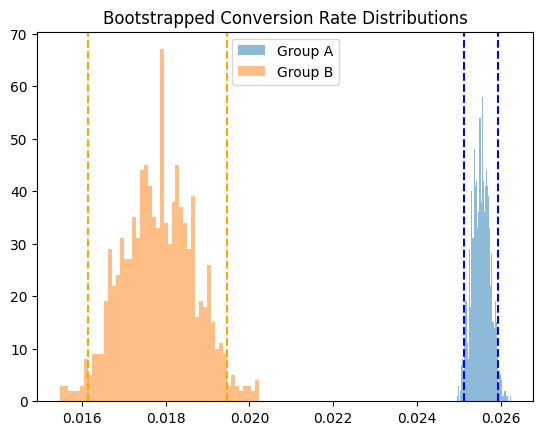

In [37]:
import matplotlib.pyplot as plt

plt.hist(boot_a, bins=50, alpha=0.5, label='Group A')
plt.hist(boot_b, bins=50, alpha=0.5, label='Group B')
plt.axvline(ci_a[0], color='blue', linestyle='--')
plt.axvline(ci_a[1], color='blue', linestyle='--')
plt.axvline(ci_b[0], color='orange', linestyle='--')
plt.axvline(ci_b[1], color='orange', linestyle='--')
plt.legend()
plt.title("Bootstrapped Conversion Rate Distributions")
plt.show()

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [41]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [42]:
gate_30 = data[data["version"] == "gate_30"]
gate_40 = data[data["version"] == "gate_40"]

ret_30 = gate_30["retention_1"]
ret_40 = gate_40["retention_1"]

retention_rate_30 = ret_30.mean()
retention_rate_40 = ret_40.mean()

print(f"1-Day Retention (gate_30): {retention_rate_30:.4f}")
print(f"1-Day Retention (gate_40): {retention_rate_40:.4f}")

1-Day Retention (gate_30): 0.4482
1-Day Retention (gate_40): 0.4423


> Statistical Test

In [43]:
successes = [ret_30.sum(), ret_40.sum()]
n_obs = [len(ret_30), len(ret_40)]

z_stat, p_val = proportions_ztest(successes, n_obs)
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_val:.4f}")

Z-statistic: 1.7841, P-value: 0.0744


In [44]:
if p_val < 0.05:
    print("The difference in 1-day retention between gate_30 and gate_40 is statistically significant at the 5% level.")
else:
    print("There is no statistically significant difference in 1-day retention between gate_30 and gate_40.")

There is no statistically significant difference in 1-day retention between gate_30 and gate_40.


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

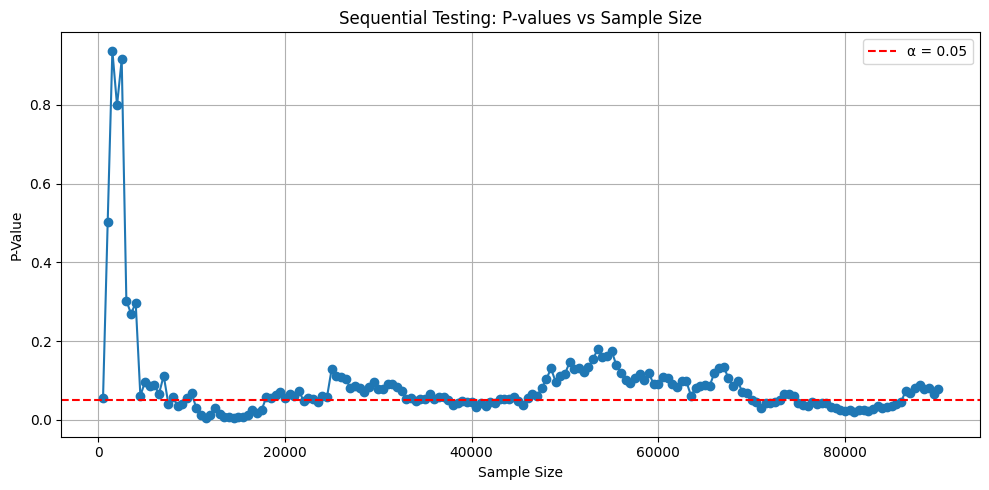

In [45]:
# Sort for consistency
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Setup for sequential testing
step = 500
max_n = len(data)
sample_sizes = []
p_values = []

for i in range(step, max_n + 1, step):
    subset = data.iloc[:i]
    
    group_counts = subset['version'].value_counts()
    retained = subset[subset['retention_1'] == 1]['version'].value_counts()
    
    successes = [retained.get('gate_30', 0), retained.get('gate_40', 0)]
    trials = [group_counts.get('gate_30', 0), group_counts.get('gate_40', 0)]
    
    if all(t > 0 for t in trials):  # Avoid division by zero
        zstat, pval = proportions_ztest(successes, trials)
        sample_sizes.append(i)
        p_values.append(pval)

# Plot p-values over sample sizes
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(0.05, color='red', linestyle='--', label='α = 0.05')
plt.title('Sequential Testing: P-values vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [47]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Define parameters
alpha = 0.05
power = 0.8
p1 = 0.44  # assumed baseline retention (e.g., gate_30)
p2 = 0.46  # target improvement (2% higher)
effect_size = proportion_effectsize(p1, p2)  # calculate Cohen's h

# Initialize power analysis object
power_analysis = NormalIndPower()

# Calculate required sample size per group
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

print(f"Required sample size per group: {round(sample_size)}")

Required sample size per group: 9712


Enjoy & Happy A/B Testing :) ......!